# Configura√ß√£o

## Importa√ß√£o

In [1]:
import pandas as pd

## Defini√ß√£o do Dataframe

In [2]:
df = pd.read_csv('../datasets/data_clean.csv')

# An√°lise Explorat√≥ria

## Correla√ß√£o

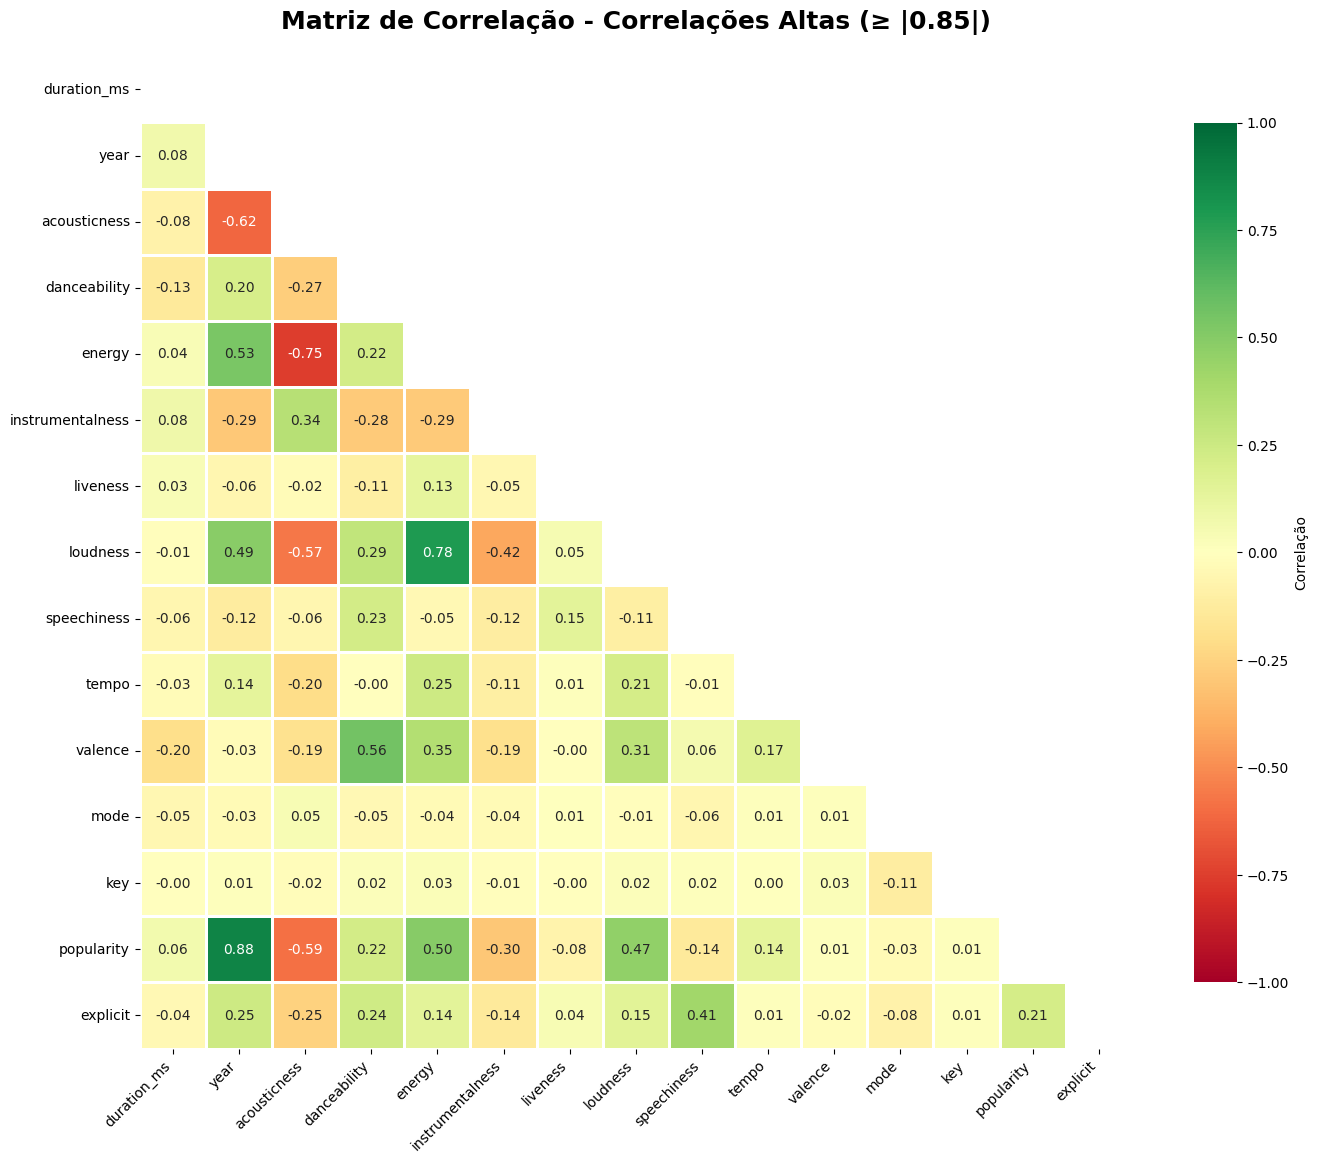

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular a matriz de correla√ß√£o
correlation_matrix = df.corr(numeric_only=True)

# Criar m√°scara para mostrar apenas a matriz triangular inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)

# Criar uma c√≥pia da matriz e setar valores fora do threshold como NaN
filtered_matrix = correlation_matrix.copy()

# Visualizar apenas a matriz triangular inferior com tema verde
plt.figure(figsize=(14, 12))
sns.heatmap(filtered_matrix, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', square=True, linewidths=1, linecolor='white',
            cbar_kws={"shrink": 0.8, "label": "Correla√ß√£o"},
            annot_kws={"size": 10}, vmin=-1, vmax=1, mask=mask)
plt.title('Matriz de Correla√ß√£o - Correla√ß√µes Altas (‚â• |0.85|)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## An√°lise Descritiva das Features

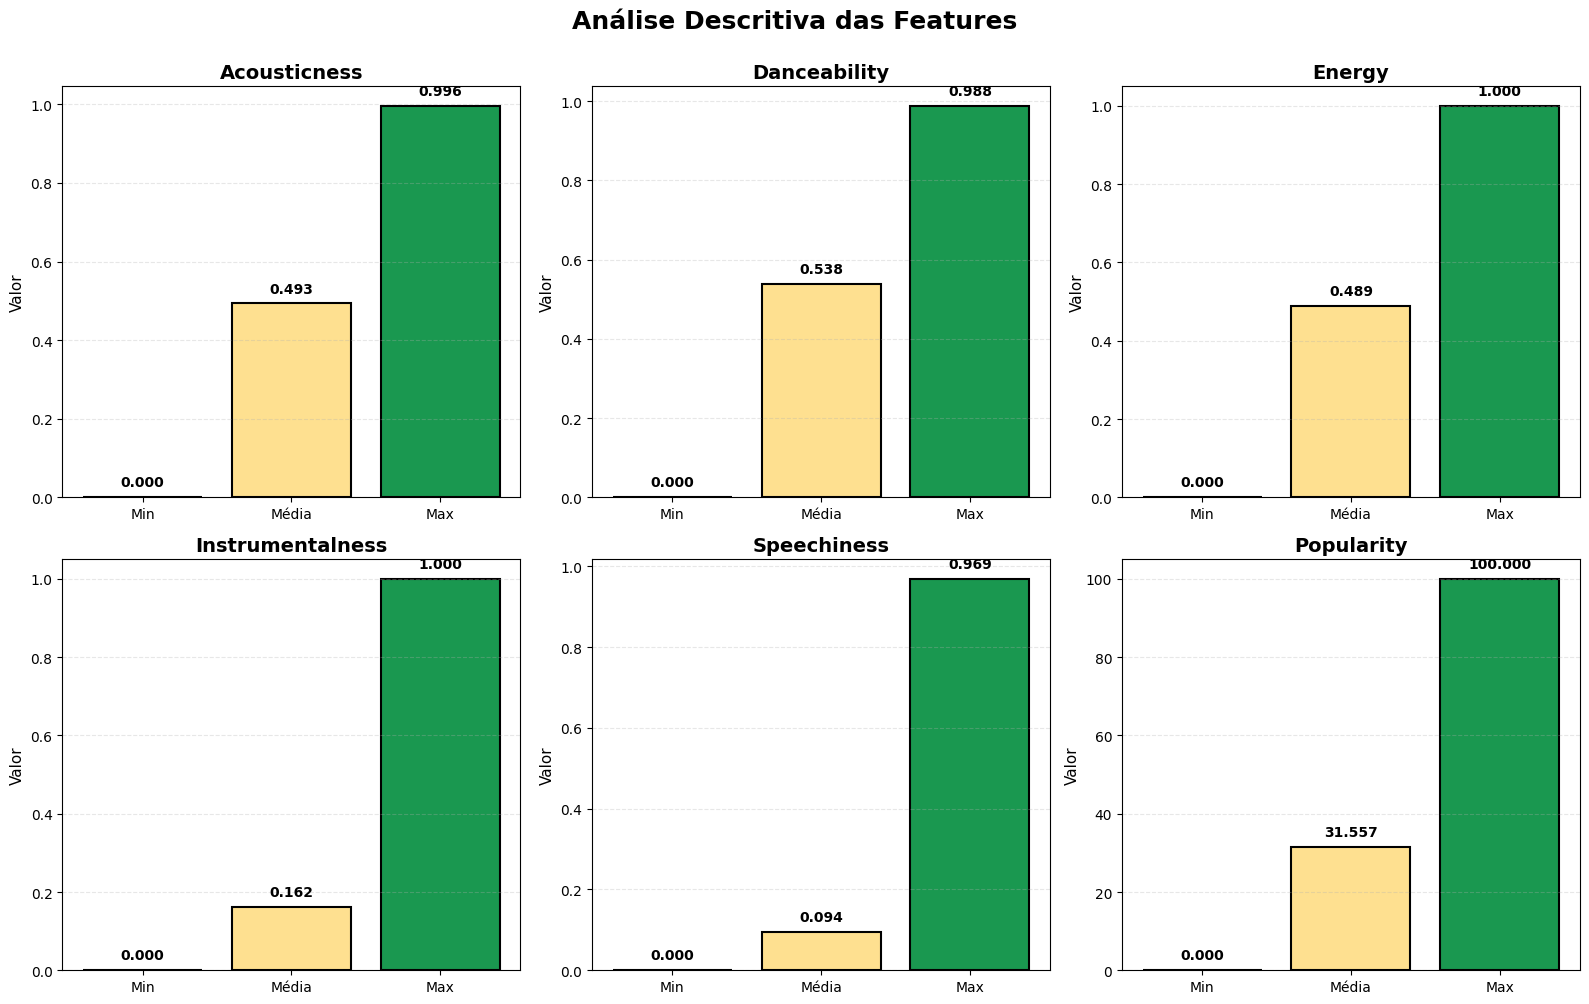

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Features para an√°lise
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'speechiness', 'popularity']

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('An√°lise Descritiva das Features', fontsize=18, fontweight='bold', y=1.00)

axes = axes.flatten()

# Para cada feature, calcular min, max e m√©dia
for idx, feature in enumerate(features):
    min_val = df[feature].min()
    max_val = df[feature].max()
    mean_val = df[feature].mean()
    
    # Criar dados para visualiza√ß√£o
    stats = [min_val, mean_val, max_val]
    labels = ['Min', 'M√©dia', 'Max']
    colors = ['#d73027', '#fee090', '#1a9850']
    
    # Plot de barras
    axes[idx].bar(labels, stats, color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_title(feature.capitalize(), fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Valor', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Adicionar valores nas barras
    for i, (label, stat) in enumerate(zip(labels, stats)):
        axes[idx].text(i, stat + (max_val - min_val) * 0.02, f'{stat:.3f}', 
                      ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

**1. Distribui√ß√£o Desbalanceada de Features**

Acousticness, Danceability, Energy, Instrumentalness e Speechiness variam de 0 a ~1.0, sugerindo dados normalizados
Popularity tem escala diferente (0-100), indicando que precisa de normaliza√ß√£o antes de usar em modelos

**2. Features com Baixa Variabilidade**

Instrumentalness e Speechiness t√™m m√©dias muito baixas (0.162 e 0.094), concentrando a maioria das m√∫sicas com pouco conte√∫do instrumental ou de fala
Isso pode resultar em baixo poder preditivo se usadas diretamente

**3. Features com Distribui√ß√£o Mais Uniforme**

Acousticness, Danceability e Energy t√™m m√©dias moderadas (~0.49), sugerindo distribui√ß√£o mais equilibrada
Estas s√£o boas candidates para recomenda√ß√£o

**4. Popularity √© Muito Vari√°vel**

Varia de 0 a 100, com m√©dia em ~31.5
Muitas m√∫sicas t√™m baixa popularidade, o que pode criar vi√©s para m√∫sicas populares se n√£o tratado

## Distribui√ß√£o

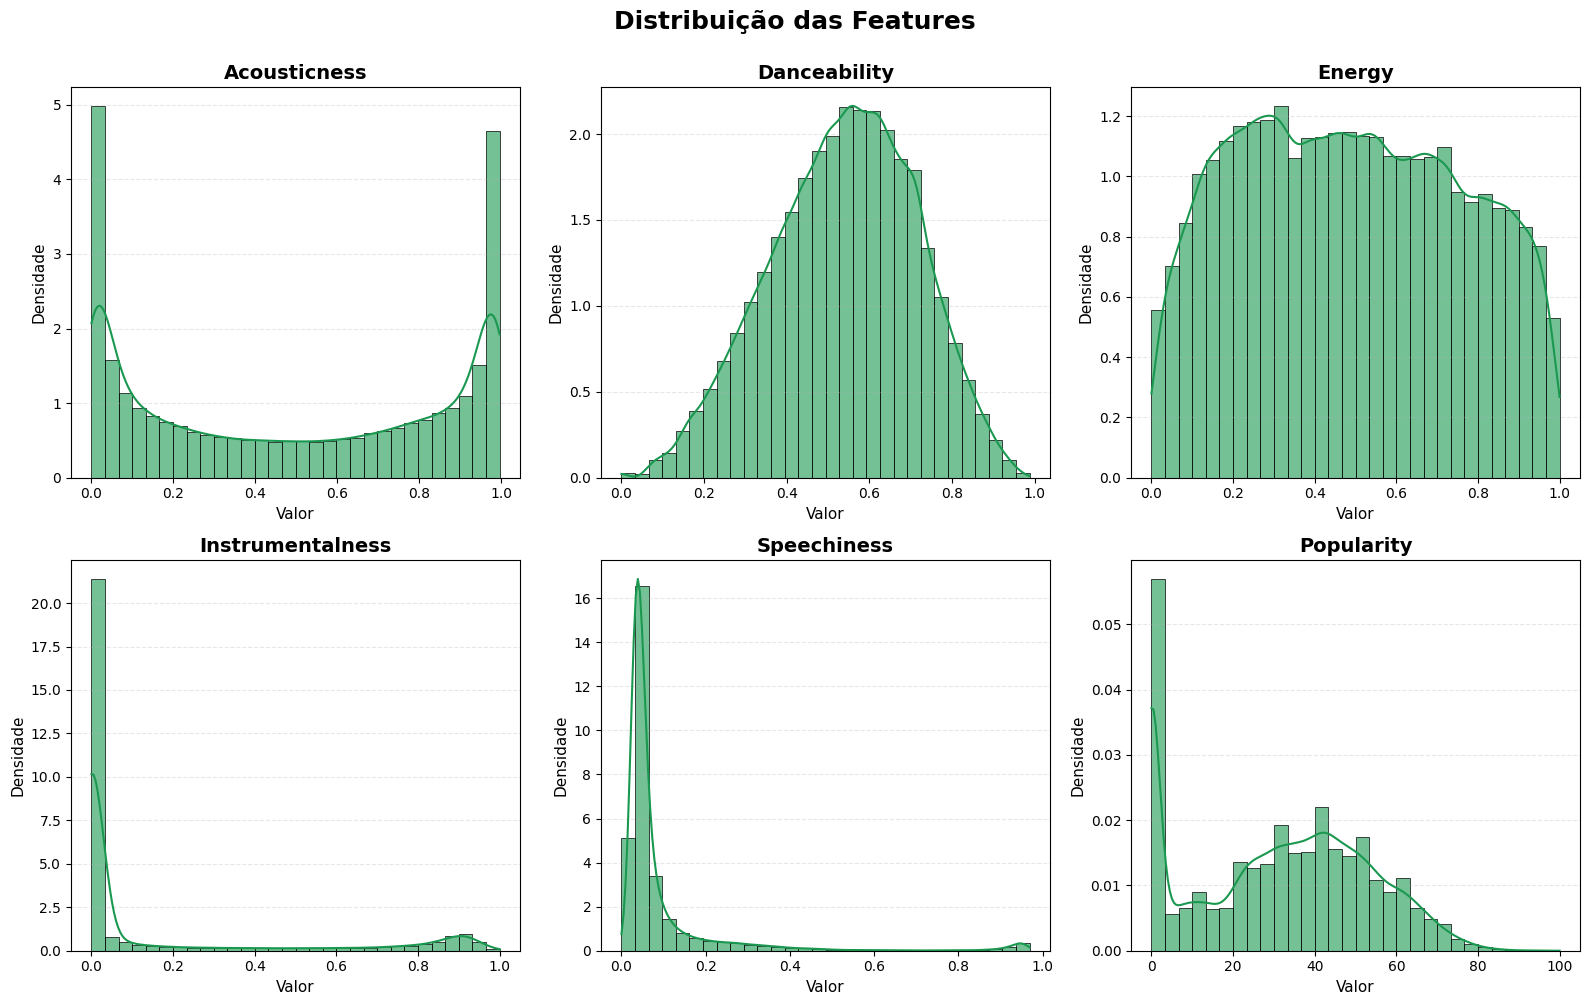

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features para an√°lise
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'speechiness', 'popularity']

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribui√ß√£o das Features', fontsize=18, fontweight='bold', y=1.00)

axes = axes.flatten()

# Para cada feature, criar histograma com KDE
for idx, feature in enumerate(features):
    # Histograma com KDE (curva de sino)
    sns.histplot(data=df, x=feature, kde=True, stat='density', 
                 bins=30, color='#1a9850', edgecolor='black', 
                 linewidth=0.5, ax=axes[idx], alpha=0.6)
    
    axes[idx].set_title(feature.capitalize(), fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Valor', fontsize=11)
    axes[idx].set_ylabel('Densidade', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

#### üìä Insights sobre as Distribui√ß√µes das Features

**1. Acousticness (Bimodal)**
- **Distribui√ß√£o em forma de U**: Concentrada nos extremos (muito ac√∫stico ou nada ac√∫stico)
- **Insight**: M√∫sicas tendem a ser ou **100% ac√∫sticas** ou **eletr√¥nicas/produzidas**
- **Implica√ß√£o para modelo**: Boa separa√ß√£o entre dois tipos de m√∫sica, √∫til para recomenda√ß√£o

**2. Danceability (Normal/Gaussiana)**
- **Distribui√ß√£o mais sim√©trica e centrada** em torno de 0.55
- **Insight**: Maioria das m√∫sicas tem **danceability moderada**
- **Implica√ß√£o**: Feature bem distribu√≠da, excelente para o modelo

**3. Energy (Ligeiramente Esquerda)**
- **Distribui√ß√£o quase normal**, ligeiramente concentrada em valores menores
- **Insight**: Mais m√∫sicas com **baixa energia** do que alta energia
- **Implica√ß√£o**: Potencial vi√©s para m√∫sicas menos energ√©ticas

**4. Instrumentalness (Altamente Assim√©trica √† Esquerda)**
- **~95% das m√∫sicas t√™m instrumentalness ‚âà 0** (t√™m vocais)
- **Apenas ~5% s√£o instrumentais**
- **Insight**: Dataset muito desbalanceado, quase nenhuma m√∫sica puramente instrumental
- **‚ö†Ô∏è Problema**: Baix√≠ssimo poder preditivo, pode prejudicar o modelo

**5. Speechiness (Altamente Assim√©trica √† Esquerda)**
- **~98% das m√∫sicas t√™m speechiness ‚âà 0** (pouca fala)
- **Apenas ~2% s√£o discursos/podcasts**
- **Insight**: Feature quase constante no dataset
- **‚ö†Ô∏è Problema**: Praticamente sem vari√¢ncia, **pode ser descartada**

**6. Popularity (Bimodal/Skewed)**
- **Pico muito alto em 0-10** (muitas m√∫sicas pouco populares)
- **Cauda longa at√© 100** (poucas m√∫sicas muito populares)
- **Insight**: Distribui√ß√£o **altamente enviesada** para baixa popularidade
- **‚ö†Ô∏è Problema**: Risco de vi√©s, modelo pode priorizar m√∫sicas populares